In [1]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM, GRU
from keras.layers import Dense

import matplotlib as plt
get_ipython().magic(u'matplotlib inline')

import datetime as dt, itertools, pandas as pd, matplotlib.pyplot as plt, numpy as np


2024-03-29 10:06:43.088448: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-29 10:06:44.368676: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/tmp/ipykernel_793426/2861513345.py:7: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic(u'matplotlib inline')


In [2]:
def split_sequence(sequence, n_steps=7, lookahead=0):
    X, y = list(), list()
    for i in range(lookahead,len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix >= len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i-lookahead:end_ix-lookahead], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

### Data preprocessing

In [3]:
tsdataframe = pd.read_csv('timeseries_lab3.csv')
tsdataframe

,Date,Price
0,1/1/2006,569.865168
1,1/2/2006,593.271930
2,1/3/2006,606.471193
3,1/4/2006,576.932773
4,1/5/2006,573.812500
...,...,...
3647,12/27/2015,832.554167
3648,12/28/2015,880.513919
3649,12/29/2015,856.883910
3650,12/30/2015,888.002212


In [4]:
tsdata = np.load('timeseries_lab3.npy')

In [5]:
tsdata

array([569.86516854, 593.27192983, 606.47119342, ..., 856.88391039,
       888.00221239, 918.49879518])

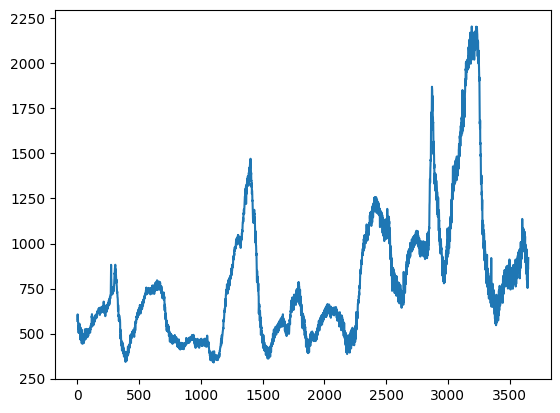

In [6]:
plt.plot(tsdata)

In [7]:
n_steps=7
n_features = 1
train_size = 2557

In [8]:
X, y = split_sequence(tsdata,n_steps)

In [9]:
X

array([[569.86516854, 593.27192983, 606.47119342, ..., 573.8125    ,
        576.17699115, 548.16748768],
       [593.27192983, 606.47119342, 576.93277311, ..., 576.17699115,
        548.16748768, 528.13043478],
       [606.47119342, 576.93277311, 573.8125    , ..., 548.16748768,
        528.13043478, 543.19517544],
       ...,
       [876.92110454, 923.34583333, 807.89142857, ..., 865.42385787,
        832.55416667, 880.51391863],
       [923.34583333, 807.89142857, 753.03703704, ..., 832.55416667,
        880.51391863, 856.88391039],
       [807.89142857, 753.03703704, 865.42385787, ..., 880.51391863,
        856.88391039, 888.00221239]])

In [10]:
tsdata[:15]

array([569.86516854, 593.27192983, 606.47119342, 576.93277311,
       573.8125    , 576.17699115, 548.16748768, 528.13043478,
       543.19517544, 540.05982906, 504.04968944, 525.14767933,
       541.65966387, 507.06172839, 517.2       ])

In [11]:
#X[:10]

In [12]:
#y[:4]

In [13]:
X = X.reshape((X.shape[0], X.shape[1], n_features))
trainX = X[:train_size]
trainy = y[:train_size]
testX = X[train_size:]
testy = y[train_size:]

In [14]:
#trainX

### LSTM model for time series prediction

In [15]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

2024-03-29 10:06:58.981795: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9455 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:08:00.0, compute capability: 7.5
2024-03-29 10:06:58.983173: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 9335 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:09:00.0, compute capability: 7.5
2024-03-29 10:06:58.984282: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 9335 MB memory:  -> device: 2, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:87:00.0, compute capability: 7.5
2024-03-29 10:06:58.985390: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 7171 MB memory:  -> device: 3, name: NVIDIA GeForce GTX

In [16]:
model.fit(trainX, trainy, epochs=20, verbose=1)

Epoch 1/20


2024-03-29 10:07:01.517478: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x562a0d144810 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-29 10:07:01.517539: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2024-03-29 10:07:01.517554: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2024-03-29 10:07:01.517564: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (2): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2024-03-29 10:07:01.517574: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (3): NVIDIA GeForce GTX 1080, Compute Capability 6.1
2024-03-29 10:07:01.517584: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (4): NVIDIA GeForce GTX 1080, Compute Capability 6.1
2024-03-29 10:07:01.517

80/80 [==============================] - 4s 15ms/step - loss: 227155.0938
Epoch 2/20
80/80 [==============================] - 1s 16ms/step - loss: 807.9385
Epoch 3/20
80/80 [==============================] - 1s 16ms/step - loss: 680.4080
Epoch 4/20
80/80 [==============================] - 1s 16ms/step - loss: 668.1791
Epoch 5/20
80/80 [==============================] - 1s 17ms/step - loss: 661.8977
Epoch 6/20
80/80 [==============================] - 1s 16ms/step - loss: 664.8443
Epoch 7/20
80/80 [==============================] - 1s 16ms/step - loss: 661.9398
Epoch 8/20
80/80 [==============================] - 1s 16ms/step - loss: 654.6578
Epoch 9/20
80/80 [==============================] - 1s 16ms/step - loss: 648.0490
Epoch 10/20
80/80 [==============================] - 1s 17ms/step - loss: 648.5803
Epoch 11/20
80/80 [==============================] - 1s 17ms/step - loss: 644.6320
Epoch 12/20
80/80 [==============================] - 1s 16ms/step - loss: 637.0699
Epoch 13/20
80/80 [==

### Prediction (test set)

In [17]:
yhat = model.predict(testX, verbose=0)

In [18]:
pred = []
for i in range(yhat.shape[0]):
    pred.append(yhat[i])
pred = np.array(pred)

Text(0.5, 0, 'Days')

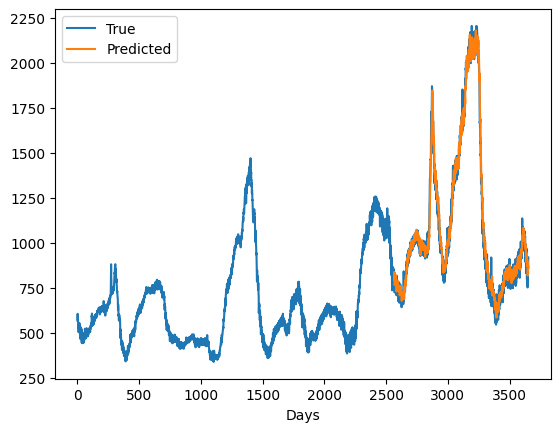

In [19]:
plt.plot(range(len(tsdata)),tsdata,label='True')
plt.plot(range(len(tsdata)-len(testy),len(tsdata)),pred,label='Predicted')
plt.legend(loc='upper left')
plt.xlabel('Days')



## Lab 4: Language Model

<b>Problem statement:</b> Use the following dataset containing element names to train a language model. Generate new names using the trained model. The generated names should resemble element names, e.g. ends with '-ium'

### Data

In [20]:
data = open('elements.txt', 'r').read()
data= data.lower()
chars = list(set('\n'.join(data)))
data_size, vocab_size = len(data), len(chars)
char_to_index = { ch:i for i,ch in enumerate(chars) }
index_to_char = { i:ch for i,ch in enumerate(chars) }
char_to_index[' '] = len(chars)
data_size, vocab_size = len(data), len(chars)


In [21]:
data

'hydrogen\nhelium\nlithium\nberyllium\nboron\ncarbon\nnitrogen\noxygen\nfluorine\nneon\nsodium\nmagnesium\naluminium\nsilicon\nphosphorus\nsulfur\nchlorine\nargon\npotassium\ncalcium\nscandium\ntitanium\nvanadium\nchromium\nmanganese\niron\ncobalt\nnickel\ncopper\nzinc\ngallium\ngermanium\narsenic\nselenium\nbromine\nkrypton\nrubidium\nstrontium\nyttrium\nzirconium\nniobium\nmolybdenum\ntechnetium\nruthenium\nrhodium\npalladium\nsilver\ncadmium\nindium\ntin\nantimony\ntellurium\niodine\nxenon\ncesium\nbarium\nlanthanum\ncerium\npraseodymium\nneodymium\npromethium\nsamarium\neuropium\ngadolinium\nterbium\ndysprosium\nholmium\nerbium\nthulium\nytterbium\nlutetium\nhafnium\ntantalum\ntungsten\nrhenium\nosmium\niridium\nplatinum\ngold\nmercury\nthallium\nlead\nbismuth\npolonium\nastatine\nradon\nfrancium\nradium\nactinium\nthorium\nprotactinium\nuranium\nneptunium\nplutonium\namericium\ncurium\nberkelium\ncalifornium\neinsteinium\nfermium\nmendelevium\nnobelium\nlawrencium\nrutherfordium\n

### Model Architecture

<img src="rnn_langmod.png" style="width:500;height:300px;">

In [22]:
import numpy as np
import tensorflow as tf

def load_and_process_data(file_path):
    with open(file_path, 'r') as file:
        elements_data = file.read().split()

    unique_chars = sorted(set(''.join(elements_data)))
    char_to_index = {char: idx for idx, char in enumerate(unique_chars)}
    index_to_char = {idx: char for idx, char in enumerate(unique_chars)}

    encoded_data = [char_to_index[char] for char in ''.join(elements_data)]

    sequence_length = 10
    sequences_list = []
    for position in range(0, len(encoded_data) - sequence_length):
        sequences_list.append(encoded_data[position:position + sequence_length])

    input_sequences = np.array(sequences_list)
    targets = tf.keras.utils.to_categorical(input_sequences[:, -1], num_classes=len(unique_chars))
    input_sequences = input_sequences[:, :-1]

    return input_sequences, targets, char_to_index, index_to_char, unique_chars


In [23]:
def define_and_train_model(input_sequences, targets, unique_chars, char_to_index, index_to_char):
    neural_network = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=len(unique_chars), output_dim=128, input_length=len(input_sequences[0])),
        tf.keras.layers.LSTM(128, return_sequences=True),
        tf.keras.layers.Dropout(0.30),
        tf.keras.layers.LSTM(128),
        tf.keras.layers.Dropout(0.45),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(len(unique_chars), activation='softmax')
    ])
    neural_network.compile(optimizer='adam', loss='categorical_crossentropy')
    neural_network.fit(input_sequences, targets, epochs=120, verbose=1)
    words_generated = []
    while len(words_generated) < 10:
        start_index = np.random.randint(0, len(input_sequences))
        sequence = input_sequences[start_index]

        text_generated = ''.join([index_to_char[index] for index in sequence])

        for _ in range(20):
            prediction_input = np.array([sequence])
            prediction = neural_network.predict(prediction_input)[0]
            next_index = np.argmax(prediction)
            next_character = index_to_char[next_index]
            text_generated += next_character
            sequence = np.append(sequence[1:], next_index)

            if text_generated.endswith('ium'):
                words_generated.append(text_generated)
                break

    return words_generated


In [25]:
file_path = 'elements.txt'
input_sequences, targets, char_to_index, index_to_char, unique_chars = load_and_process_data(file_path)
words_generated = define_and_train_model(input_sequences, targets, unique_chars, char_to_index, index_to_char)



Epoch 1/120
29/29 [==============================] - 7s 33ms/step - loss: 3.0053
Epoch 2/120
29/29 [==============================] - 1s 19ms/step - loss: 2.8263
Epoch 3/120
29/29 [==============================] - 0s 10ms/step - loss: 2.8039
Epoch 4/120
29/29 [==============================] - 0s 10ms/step - loss: 2.7887
Epoch 5/120
29/29 [==============================] - 1s 27ms/step - loss: 2.7666
Epoch 6/120
29/29 [==============================] - 0s 10ms/step - loss: 2.7435
Epoch 7/120
29/29 [==============================] - 0s 10ms/step - loss: 2.6712
Epoch 8/120
29/29 [==============================] - 0s 11ms/step - loss: 2.5614
Epoch 9/120
29/29 [==============================] - 0s 10ms/step - loss: 2.4452
Epoch 10/120
29/29 [==============================] - 0s 10ms/step - loss: 2.3726
Epoch 11/120
29/29 [==============================] - 0s 10ms/step - loss: 2.3243
Epoch 12/120
29/29 [==============================] - 0s 10ms/step - loss: 2.2911
Epoch 13/120
29/29 [=====

In [26]:
print(words_generated)

['chlorineargonpotassium', 'oscoviumlivermorium', 'mrutherfordium', 'kryptonrubidium', 'iumarsenicselenium', 'hanumcerium', 'umbohriumhassium', 'mbohriumhassium', 'luorineneonsodium', 'cgalliumgermanium']
